# Exploratory Data Analysis

In [7]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **AADT**
 _Annual Average Daily Traffic (AADT) is a metric used to calculate the average daily traffic volume on a road or highway over a year. It sums up all vehicle trips on a road segment for a year and then divides by 365 days. It's expressed in vehicles per day (vpd)._

-*Infrastructure and Transport Plann*: Helps in designing roads and managing traffic congestion. -*Retail and Real Eat*: Used by retailers and real estate professionals to assess site potential
 - Law Enfocermen*: Aids in accident investigations and legal cases -*Legislaivte Us*: Assists lawmakers in budgeting and prioritizing transportationprojects.

- Limitatis**: While AADT is widely used, it doesn't account for seasonal or day-of-week variations in traffic patterns, leading to a more generalized view of traffic flow.


### **AADT**
 _Annual Average Daily Traffic (AADT) is a metric used to calculate the average daily traffic volume on a road or highway over a year. It sums up all vehicle trips on a road segment for a year and then divides by 365 days. It's expressed in vehicles per day (vpd)._

### Applications
- Infrastructure and Transport Planng: Helps in designing roads and managing traffic congestion.
- Retail and Real Eate: Used by retailers and real estate professionals to assess site potential.
- Law Enforcement: Aids in accident investigations and legal cases
- Legislative Use: Assists lawmakers in budgeting and prioritizing transportation projects

Limitations: While AADT is widely used, it doesn't account for seasonal or day-of-week variations in traffic patterns, leading to a more generalized view of traffic flow.


### AADT Dataset Info
The Annual Average Daily Traffic (AADT) data is collected by the Maryland Department of Transportation and contains information regarding geographic coverage,  traffic volume information and historical data for the past decade. The collected data is present in both linear road segment and point geometric features, the linear road segment dataset was used for this analysis. The data was collected using over 8700 counting stations and 84 Automatic Traffic Recorders (ATRs). Counts were taken every 3 or 6 year cycle and complemented by growth factor adjustments. This data serves as a critical resource for both federal and state agencies. 

### Link to Data Source
https://data.imap.maryland.gov/datasets/3f4b959826c34480be3e4740e4ee025f_1/explore?showTable=true

In [8]:
# Loaded the AADT road segment data
aadt_data = pd.read_csv('MDOT_SHA_Annual_Average_Daily_Traffic_(AADT).csv')

In [9]:
aadt_data.head()

,OBJECTID,LOCATION_ID,COUNTY_ID,COUNTY_DESC,MUN_SORT,MUNICIPALITY,ROADNAME,ID_PREFIX,ID_RTE_NO,MP_SUFFIX,...,COMBINATION_UNIT_AADT,LOC_ERROR,Shape__Length0,AADT_2019,AAWDT_2019,AADT_2020,AAWDT_2020,AADT_2021,AAWDT_2021,SHAPE_Length
0,84093,S2011020850,2,Anne Arundel,0,NaN,Chestnut Tree Dr,CO,2468,,...,NaN,NO ERROR,NaN,3682,4052,3073,3323,3524,3704,1770.025170
1,84094,S2006010024,1,Allegany,0,NaN,Ramp 6 Fr Is 68 Eb To Midlothian Rd Sb,RP,68,,...,NaN,NO ERROR,NaN,181,191,152,162,173,183,209.910519
2,84095,S2012030011,3,Baltimore,0,NaN,Old Battle Grove Rd,CO,5558,,...,NaN,NO ERROR,NaN,3111,3421,2602,2812,2983,3133,299.486430
3,84096,S2012030219,3,Baltimore,0,NaN,Washington Ave,CO,1172,,...,NaN,NO ERROR,NaN,4901,5391,4092,4422,4683,4923,161.465065
4,84097,B3824,5,Caroline,0,NaN,Dover Rd,MD,331,,...,NaN,NO ERROR,NaN,12331,13071,10302,11132,11793,12623,6188.617149


In [10]:
aadt_data.info() # Checked for missing values and column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10013 entries, 0 to 10012
Data columns (total 60 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   OBJECTID               10013 non-null  int64  
 1   LOCATION_ID            10013 non-null  object 
 2   COUNTY_ID              10013 non-null  int64  
 3   COUNTY_DESC            10013 non-null  object 
 4   MUN_SORT               10013 non-null  int64  
 5   MUNICIPALITY           1372 non-null   object 
 6   ROADNAME               10013 non-null  object 
 7   ID_PREFIX              10013 non-null  object 
 8   ID_RTE_NO              10013 non-null  int64  
 9   MP_SUFFIX              10013 non-null  object 
 10  ID_MP                  10013 non-null  float64
 11  BEGIN_SECTION          10013 non-null  float64
 12  END_SECTION            10013 non-null  float64
 13  STATION_DESC           10013 non-null  object 
 14  ROAD_SECTION           10013 non-null  object 
 15  RU

### Data Cleaning and Column Selection
Dropped columns from dataset based on the following factors:
1. relevance to analysis 
2. redundancy
3. missing/irrelevant data
4. efficiency
   
_Columns including annual average weekday traffic and vehicle class AADT were removed. AADT is the main output being analyzed in this project and vehicle class AADT contained significant amount of missing values. ID information, redundant location info and data related to road segment mapping were also removed._

In [11]:
# Created list containing columns that are to be dropped from the dataset 
columns_to_drop = ['OBJECTID', 'LOCATION_ID', 'COUNTY_ID', 'MUN_SORT', 'LOC_ERROR','ID_RTE_NO',
                   'MP_SUFFIX','ID_MP','BEGIN_SECTION','END_SECTION','F_SYSTEM','ROUTEID','ROUTEID_RH',
                   'MAIN_LINE','COUNTED_FACTORED', 'STMP_SEQ','K_FACTOR', 'D_FACTOR','LINK','AAWDT_2013', 
                   'AAWDT_2014', 'AAWDT_2015', 'AAWDT_2016', 'AAWDT_2017','AAWDT_2018', 'AAWDT', 
                   'MOTORCYCLE_AADT', 'CAR_AADT', 'LIGHT_TRUCK_AADT', 'BUS_AADT', 'SINGLE_UNIT_AADT',
                   'COMBINATION_UNIT_AADT', 'LOC_ERROR', 'Shape__Length0','AAWDT_2019', 'AAWDT_2020',
                   'AAWDT_2021','SHAPE_Length','PEAK_HOUR_DIRECTION', 'NORTH_EAST_SPLIT', 'SOUTH_WEST_SPLIT','MUNICIPALITY'] 

aadt_data = aadt_data.drop(columns = columns_to_drop)

In [12]:
aadt_data.columns

Index(['COUNTY_DESC', 'ROADNAME', 'ID_PREFIX', 'STATION_DESC', 'ROAD_SECTION',
       'RURAL_URBAN', 'F_SYSTEM_DESC', 'NUM_LANES', 'AVMT', 'AADT_2013',
       'AADT_2014', 'AADT_2015', 'AADT_2016', 'AADT_2017', 'AADT_2018', 'AADT',
       'AADT_2019', 'AADT_2020', 'AADT_2021'],
      dtype='object')

In [13]:
aadt_data['ID_PREFIX'].unique() # could not find definintions for OP and GV 

array(['CO', 'RP', 'MD', 'IS', 'US', 'MU', 'SR', 'OP', 'GV'], dtype=object)

In [14]:
#OP and GV only had 19 and 21 observations respectively out of 10013 rows and put them in unknown
#filtered ID_prefix series for OP and GV generating boolean value series and then used sum function to find count
print((aadt_data['ID_PREFIX'] == 'OP').sum())
print((aadt_data['ID_PREFIX'] == 'GV').sum())

19
21


In [15]:
#created dictionary with prefix definitions
road_type_dict = {
    'IS': 'Interstate Highways',
    'US': 'U.S. Routes',
    'MD': 'Maryland State Routes',
    'CO': 'County Roads',
    'MU': 'Municipal Roads',
    'SR': 'State Routes',
    'RP': 'Ramp'}
#used map function with dictionary as input and used fillna to set OP and GV prefixes as unknown
aadt_data['ID_PREFIX'] = aadt_data['ID_PREFIX'].map(road_type_dict).fillna('Unknown')

In [16]:
aadt_data.head()

,COUNTY_DESC,ROADNAME,ID_PREFIX,STATION_DESC,ROAD_SECTION,RURAL_URBAN,F_SYSTEM_DESC,NUM_LANES,AVMT,AADT_2013,AADT_2014,AADT_2015,AADT_2016,AADT_2017,AADT_2018,AADT,AADT_2019,AADT_2020,AADT_2021
0,Anne Arundel,Chestnut Tree Dr,County Roads,Chestnut Tree Dr - Between Green Holly Dr & Ra...,Hilltop Dr To Green Holly Dr,Urban,Local,2,1.1159,3822.0,3813.0,3914.0,3995.0,3710.0,3681.0,3555,3682,3073,3524
1,Allegany,Ramp 6 Fr Is 68 Eb To Midlothian Rd Sb,Ramp,Exit 33 Ramp 6 From Is 68 Eb To Midlothian Rd Sb,Exit 33 Ramp 06 Ramp 3 Fr Ramp 6 To Midlothian...,Urban,Interstate,1,0.0054,171.0,172.0,183.0,194.0,205.0,180.0,184,181,152,173
2,Baltimore,Old Battle Grove Rd,County Roads,Old Battle Grove Rd - Between North Point Rd &...,North Point Rd To Road End,Urban,Minor Collector,2,0.1754,2961.0,2952.0,3033.0,3094.0,3175.0,3110.0,3004,3111,2602,2983
3,Baltimore,Washington Ave,County Roads,Washington Ave - Between Joppa Rd & Md 45,Joppa Rd W To Md 45,Urban,Major Collector,2,0.1204,4451.0,4442.0,4563.0,4654.0,4775.0,4900.0,4714,4901,4092,4683
4,Caroline,Dover Rd,Maryland State Routes,Md331-.20 Mi S Of Us50,Md 578 To Talbot Co/l,Rural,Minor Arterial,2,30.0700,11841.0,11812.0,11640.0,11861.0,12152.0,12330.0,11864,12331,10302,11793


In [17]:
# Renamed Columns according to table found in source website https://data.imap.maryland.gov/datasets/3f4b959826c34480be3e4740e4ee025f_1/explore?location=38.753802%2C-77.269750%2C8.00&showTable=true

aadt_data.rename(columns={'COUNTY_DESC': 'COUNTY', 'ID_PREFIX': 'ROAD_TYPE', 'F_SYSTEM_DESC': 'ROAD_FUNCTION',
                          'AVMT':'AVERAGE_VEHICLE_MILES_TRAVELED','AADT':'AADT_2022'}, inplace=True)

In [18]:
# Extract available years/counties/road_type from the dataset for use in streamlit dashboard

#list compehension iterating through columns starting with AADT_ and extracting year from column name using split
available_years = [col.split('_')[1] for col in aadt_data.columns if col.startswith('AADT_')] 
# unique values present in county column
available_counties = aadt_data['COUNTY'].unique()
#unique values present in road_type column
available_road_types = aadt_data['ROAD_TYPE'].unique()

In [19]:
available_counties

array(['Anne Arundel', 'Allegany', 'Baltimore', 'Caroline', 'Frederick',
       'Dorchester', 'Cecil', 'Carroll', 'Calvert', 'Charles',
       "Prince George's", 'Wicomico', 'Worcester', 'Harford', 'Howard',
       'Montgomery', 'Baltimore City', 'Somerset', 'Garrett',
       "Queen Anne's", 'Talbot', 'Kent', 'Washington', "St. Mary's"],
      dtype=object)

In [20]:
# retrieve aadt data for a specific year
def get_yearly_traffic_data(data, year): #takes df and year as arguments
    year_column = f'AADT_{year}' # variable to select for aadt column  using f string
    if year_column in data.columns: #checks if year_column in df aadt_data columns
        return data[['ROADNAME', 'COUNTY', year_column]] # outputs dataframe with specified columns
    else:
        return None

# compares aadt_Data between two years
def compare_annual_traffic(data, year1, year2): #takes df and years to be compared as arguments
    col1, col2 = f'AADT_{year1}', f'AADT_{year2}' # created col1,col2 variables to select for aadt columns  using f stringa
    if col1 in data.columns and col2 in data.columns: #checks if col1,col2 in df aadt_data columns
        return data[['ROADNAME', 'COUNTY','ROAD_SECTION', col1, col2]] # outputs dataframe with specified columns
    else:
        return None

# average traffic volume by county for a specified year
def average_traffic_by_county(data, year):#takes df and year as arguments
    year_column = f'AADT_{year}' # variable to select for aadt column  using f string
    if year_column in data.columns: #checks if year_column in df aadt_data columns
        return data.groupby('COUNTY')[year_column].mean().sort_values(ascending=False) # groups by county and applies mean function to aadt_year column
    else:
        return None

# average traffic volume by road type for a specified year
def average_traffic_by_road_type(data, year):#takes df and year as arguments
    year_column = f'AADT_{year}' # variable to select for aadt column  using f string
    if year_column in data.columns: #checks if year_column in df aadt_data columns
        return data.groupby('ROAD_TYPE')[year_column].mean().sort_values(ascending=False) # groups by road_type and applies mean function to aadt_year column
    else:
        return None

In [21]:
get_yearly_traffic_data(aadt_data,2020).head()

,ROADNAME,COUNTY,AADT_2020
0,Chestnut Tree Dr,Anne Arundel,3073
1,Ramp 6 Fr Is 68 Eb To Midlothian Rd Sb,Allegany,152
2,Old Battle Grove Rd,Baltimore,2602
3,Washington Ave,Baltimore,4092
4,Dover Rd,Caroline,10302


In [22]:
compare_annual_traffic(aadt_data, 2020, 2022).head()

,ROADNAME,COUNTY,ROAD_SECTION,AADT_2020,AADT_2022
0,Chestnut Tree Dr,Anne Arundel,Hilltop Dr To Green Holly Dr,3073,3555
1,Ramp 6 Fr Is 68 Eb To Midlothian Rd Sb,Allegany,Exit 33 Ramp 06 Ramp 3 Fr Ramp 6 To Midlothian...,152,184
2,Old Battle Grove Rd,Baltimore,North Point Rd To Road End,2602,3004
3,Washington Ave,Baltimore,Joppa Rd W To Md 45,4092,4714
4,Dover Rd,Caroline,Md 578 To Talbot Co/l,10302,11864


In [23]:
average_traffic_by_county(aadt_data, 2020)

COUNTY
Prince George's    14280.096471
Montgomery         13073.946397
Howard             12790.520755
Baltimore          12084.788124
Anne Arundel       11055.895131
Baltimore City      9380.200651
Charles             9367.503937
St. Mary's          8030.312500
Harford             7968.071429
Frederick           7895.475630
Calvert             6996.306306
Cecil               6008.987500
Washington          5914.612500
Queen Anne's        5728.156250
Carroll             5447.343284
Worcester           4923.232558
Wicomico            4919.644518
Talbot              4675.974026
Allegany            3429.409786
Caroline            3412.989130
Somerset            3012.566667
Dorchester          3010.938053
Kent                2561.283582
Garrett             2295.601504
Name: AADT_2020, dtype: float64

In [24]:
average_traffic_by_road_type(aadt_data,2020)

ROAD_TYPE
Interstate Highways      90317.870504
U.S. Routes              25807.066456
Maryland State Routes    14404.301978
State Routes              9907.142857
Unknown                   8701.125000
County Roads              5754.154206
Municipal Roads           5277.228134
Ramp                      4645.659820
Name: AADT_2020, dtype: float64

C:\Users\gyans\AppData\Local\Temp\ipykernel_8884\1023852219.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = AVMT_data.index, y = AVMT_data.values, palette = 'rocket')


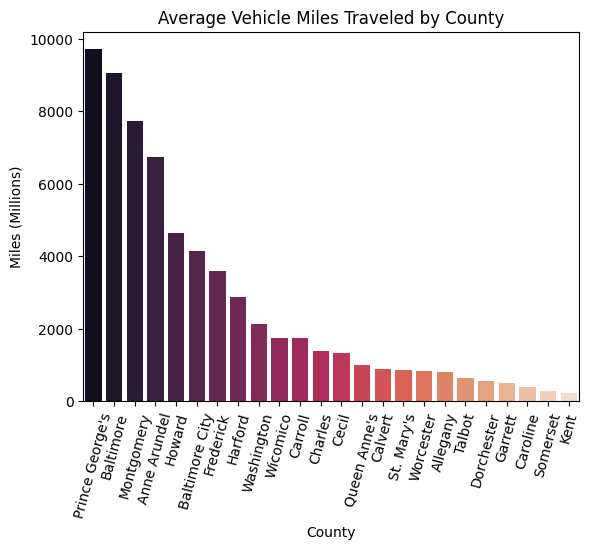

In [25]:
# Grouping data
AVMT_data = aadt_data.groupby("COUNTY")["AVERAGE_VEHICLE_MILES_TRAVELED"].sum().sort_values(ascending=False)

# Create figure and axis
fig, ax = plt.subplots()
# Plotting
sns.barplot(x = AVMT_data.index, y = AVMT_data.values, palette = 'rocket')
ax.set_title('Average Vehicle Miles Traveled by County')
ax.set_xlabel('County')
ax.set_ylabel('Miles (Millions)')
plt.xticks(rotation=75);



C:\Users\gyans\AppData\Local\Temp\ipykernel_8884\4078339291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_traffic_county.values, y=avg_traffic_county.index,ax=ax, palette = 'rocket')


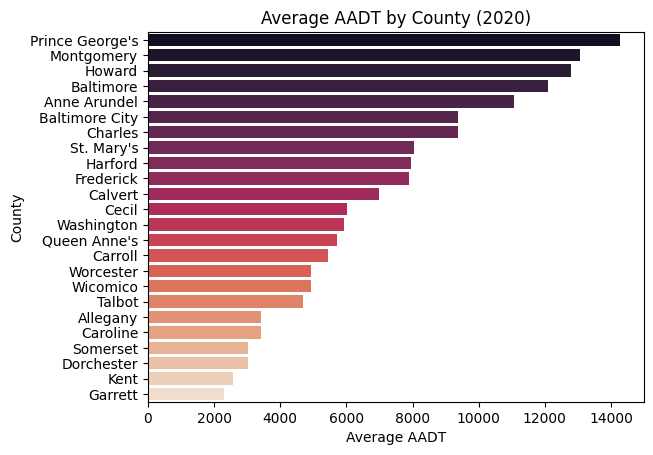

In [26]:
avg_traffic_county = average_traffic_by_county(aadt_data, 2020)
fig, ax = plt.subplots()
sns.barplot(x=avg_traffic_county.values, y=avg_traffic_county.index,ax=ax, palette = 'rocket')
ax.set_title(f'Average AADT by County (2020)')
ax.set_xlabel('Average AADT')
ax.set_ylabel('County');